<a href="https://colab.research.google.com/github/LCaravaggio/EscueladeInnovacion/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download radheshyamkollipara/bank-customer-churn

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
License(s): other
  0% 0.00/307k [00:00<?, ?B/s]
100% 307k/307k [00:00<00:00, 61.1MB/s]


In [3]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [11]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("Customer-Churn-Records.csv", delimiter=",",header='infer')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
data.shape

(10000, 18)

In [7]:
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [14]:
data=pd.get_dummies(data, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

In [15]:
data_new = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [16]:
data_new.dtypes

,0
CreditScore,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64
Complain,int64


In [17]:
data_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False


In [18]:
data_y = pd.DataFrame(data_new['Exited'])
data_X = data_new.drop(['Exited'], axis=1)
print(data_X.columns)
print(data_y.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')
Index(['Exited'], dtype='object')


In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=2, stratify=data_y)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(7000, 17)
(3000, 17)
(7000, 1)
(3000, 1)


In [20]:
from sklearn import svm
from xgboost import XGBClassifier
clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9966666666666667


In [24]:
print(metrics.precision_score(y_test, y_pred))

0.9886178861788618


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

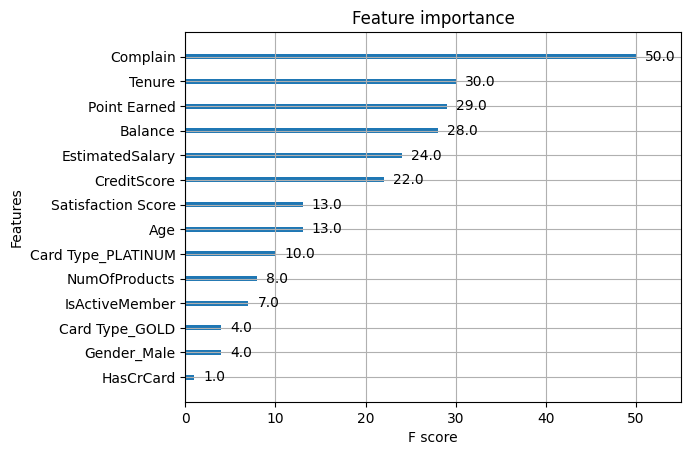

In [25]:
from xgboost import plot_importance
plot_importance(clf)